# SI 618 - Homework #1: Data Manipulation

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel! **

A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


### 0. Download the data from:

https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: we suggest you use the read_html function to load the data into a DataFrame.
                                                                 

In [11]:
MY_UNIQNAME = 'xinyexu' # please fill in your uniqname

In [7]:
# data
import numpy as np
import pandas as pd
import matplotlib

event = pd.read_csv('/Users/xuxinye/Downloads/athlete_events.csv')
region = pd.read_csv('/Users/xuxinye/Downloads/noc_regions.csv')

# a = {'class': "wikitable sortable jquery-tablesorter"} # create an appropriate dictionary
# host = pd.read_html("https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities", attrs=a)
host_scraped  = pd.read_html("https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities")

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### 5 pt: Describe the dataset. 
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [10]:
# put your code here
print(region.shape)
print(event.shape)
print(len(host_scraped)) # directly scrap from html is a list
event.describe()

(230, 3)
(271116, 15)
8


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


(1) The athlete_events has 271116 rows and 15 columns;  noc_regions has 230 rows and 3 columns. host_scraped is a list of 8, because it was directly scraped from html.

(2) There is an athlete who was only 10 years old and there is also another athlete with 97 age. 

### 5 pt: What is the overall ratio of female to male atheletes? 
There are multiple ways one could determine the meaning of "overall" here, and there isn't necessarily one correct answer. Based on your interpretation, give a justification for the choices you made in your analysis.

In [20]:
print(event.Sex.value_counts())
event.Sex.value_counts()[1] / event.Sex.value_counts()[0]

M    196594
F     74522
Name: Sex, dtype: int64


0.37906548521318045

In the cloumn of Sex, there are 196594 M and 74522 F, so the ratio is 74522/ 196594

### 10 pt: Which athelete competed in most number of events? 
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [49]:
# put your code here
print(event.Name.value_counts().sort_values(ascending = False)[0:3])
df = event[event.Name == 'Robert Tait McKenzie']
print(df.Year.unique())
print(df.Event.unique())
print(df.Team.unique())

Robert Tait McKenzie        58
Heikki Ilmari Savolainen    39
Joseph "Josy" Stoffel       38
Name: Name, dtype: int64
[1912 1928 1932 1936 1948]
['Art Competitions Mixed Sculpturing'
 'Art Competitions Mixed Sculpturing, Statues'
 'Art Competitions Mixed Sculpturing, Medals And Reliefs'
 'Art Competitions Mixed Sculpturing, Unknown Event'
 'Art Competitions Mixed Sculpturing, Medals']
['Canada']



Robert Tait McKenzie attened the largest number of events. 

He has joined: 
['Art Competitions Mixed Sculpturing'
 'Art Competitions Mixed Sculpturing, Statues'
 'Art Competitions Mixed Sculpturing, Medals And Reliefs'
 'Art Competitions Mixed Sculpturing, Unknown Event'
 'Art Competitions Mixed Sculpturing, Medals']

He has attend in the years of 1912 1928 1932 1936 1948.
And he represented Canada. 

### 10 pt: Which sport has the highest median athlete age? 
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

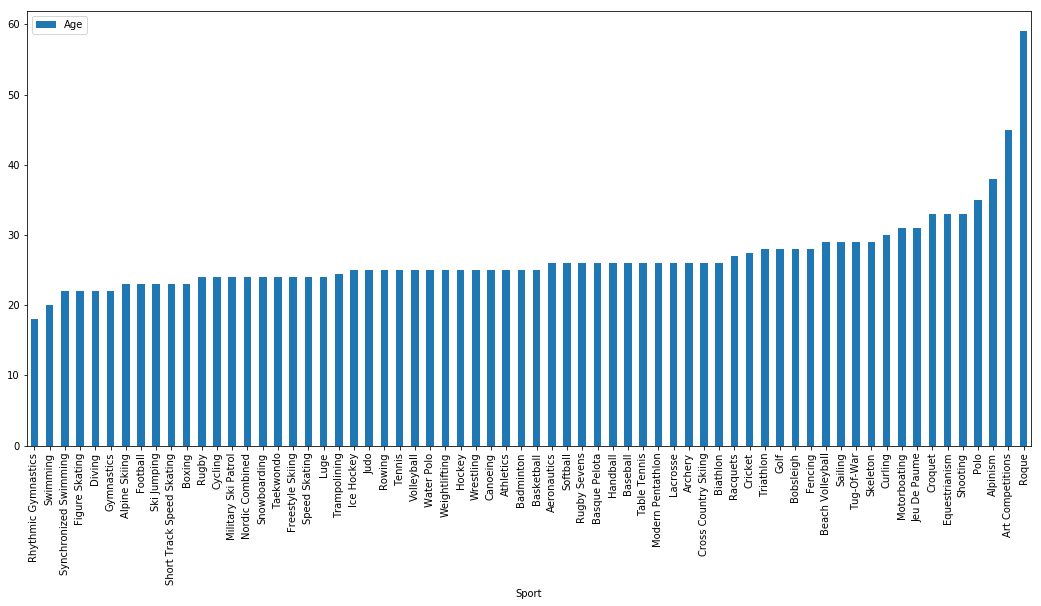

In [64]:
# put your code here
hig_med = event[["Age", "Sport"]].groupby("Sport").median().sort_values(by='Age')
hig_med.tail()
hig_med.plot.bar(figsize=(18,8))

From the plot, Roque has the highest median athlete age 59.  

### 10 pt: In which events has the Netherlands won the most medals?

In [159]:
# put your code here
event.head()
medals = event[event.Team == 'Netherlands'][["Event", "Medal"]].groupby("Event").count()
medals.sort_values(by='Medal', ascending = False)[0:3]
meadls.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In the event called 'Hockey Women's Hockey', Netherlands has teh highest medals. 

### 10 pt: Which countries have more female medalists than male medalists?

In [222]:
event_new = event.drop_duplicates(subset = 'ID',keep = 'first') # duplicates for the same medalists
meadls = event_new.dropna(subset=['Medal'])
medals_m = dict(meadls[meadls['Sex']=='M'].groupby(['NOC'])['ID'].count()) # using NOC instead of Team
medals_f = dict(meadls[meadls['Sex']=='F'].groupby(['NOC'])['ID'].count()) # using dict, delete NA cond
cot = []
for team in medals_f:
    if team in medals_m: # chack whether m is NA
        if medals_f[team] > medals_m[team]:
            cot.append(team)
    else:
        cot.append(team)
cot 

['BLR', 'BRN', 'CHN', 'CRC', 'JAM', 'MNE', 'PER', 'PRK', 'ZIM']

['BLR', 'BRN', 'CHN', 'CRC', 'JAM', 'MNE', 'PER', 'PRK', 'ZIM'] have more female atheles with medals


### 10 pt: Which country won the most medal points in each of the 2016 Summer Olympics?
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [225]:
def score(x):
    if x == 'Gold':
        return 3
    elif x == 'Silver':
        return 2
    elif x == 'Bronze':
        return 1
    else:
        return 0
sub_df = event[event.Games == '2016 Summer'][["NOC","Medal"]]
sub_df["points"] = sub_df["Medal"].apply(score)
sub_df.groupby("NOC").sum().sort_values("points", ascending=False).head(5)

# event_2016 = event[event.Games == '2016 Summer']
# event_2016.loc[:,'unique_ID'] =  event_2016.index 
# medl_count = event_2016.pivot_table(index='Medal',columns='NOC',values = 'unique_ID', aggfunc = lambda x: len(x.unique()))
# medl_count = medl_count.fillna(0)
# medl_count.loc['point',:] = medl_count.loc['Bronze',:] * 1 + medl_count.loc['Gold',:] * 3 +  medl_count.loc['Silver',:] * 1
# medl_count.loc['point',:].sort_values(ascending = False)[0:5] 540?

,points
NOC,
USA,596
GBR,328
GER,300
RUS,247
CHN,235


USA has the highest point with 596

### 20 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  

In [239]:
# a = {'class': "wikitable sortable jquery-tablesorter"} # create an appropriate dictionary
# host = pd.read_html("https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities", attrs=a)
host_scraped  = pd.read_html("https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities")
def replace(x):
    if x[1] == "United States":
        return "USA"
    if x[1] == "United Kingdom":
        return "UK"
    return x[1]
host_new = pd.DataFrame(host_scraped[1])
host_new[1] = host_new.apply(replace,axis=1)
host_new = host_new[[0,1]]

host_new = host_new.rename(columns = {0:"Host_City", 1:"Host_Country"})
host_new = host_new.append({"Host_City":"Athina", "Host_Country":"Greece"}, ignore_index=True)
host_new = host_new.append({"Host_City":"Torino", "Host_Country":"Italy"}, ignore_index=True)
host_new = host_new.append({"Host_City":"St. Louis", "Host_Country":"USA"}, ignore_index=True)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [252]:
# merge dataframe
host_cot = pd.merge(event,host_new,how='left',left_on='City',right_on='Host_City')
host_cot = pd.merge(host_cot,region,how='left',left_on='NOC',right_on='NOC') # from '/Users/xuxinye/Downloads/noc_regions.csv'

# Host obtained Gold medals
Gold = host_cot[(host_cot['Medal']=='Gold') & (host_cot['Host_Country'] == host_cot['region'])]
Gold = Gold.drop_duplicates(subset=["Games","Event"]).groupby('Games')['Medal'].count()

# the Number of medal in each game.
Total = event[event['Medal']=='Gold']
Total = Total.drop_duplicates(subset=['Games','Event'])
All_medal = Total[['Games','Medal']].groupby('Games').count()
All_medal = All_medal.rename(columns = {'Medal':'Gold_all'})

# Final Result
result = pd.concat([Gold,All_medal], axis=1)
result = result.fillna(0)
result = result.rename(columns = {'Medal':'Gold_host'}) # change the same names for column
result['ratio'] = result.apply(lambda x: x["Gold_host"] / x["Gold_all"], axis=1)

result

/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,Gold_host,Gold_all,ratio
1896 Summer,10.0,43,0.232558
1900 Summer,28.0,89,0.314607
1904 Summer,76.0,95,0.800000
1906 Summer,8.0,74,0.108108
1908 Summer,56.0,109,0.513761
1912 Summer,24.0,106,0.226415
1920 Summer,0.0,154,0.000000
1924 Summer,14.0,129,0.108527
1924 Winter,0.0,17,0.000000
1928 Summer,8.0,118,0.067797


From above,the ratio represents the percentage of host won gold medals again the total number.